In [1]:
import pandas as pd

churn = pd.read_csv(f"final_churn_data.csv")

In [2]:
from sklearn.model_selection import train_test_split

X = churn.drop('Exited', axis=1)
y = churn['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [3]:
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (7988, 17)
Testing set: (1997, 17)


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8617926890335503


Age                              0.164838
NumOfProducts                    0.101025
NumOfProducts_EstimatedSalary    0.088794
Balance                          0.071350
CreditScore_Age                  0.069776
TenureByAge                      0.068008
BalanceSalaryRatio               0.067891
Balance_EstimatedSalary          0.064061
CreditScore                      0.063950
EstimatedSalary                  0.060475
dtype: float64


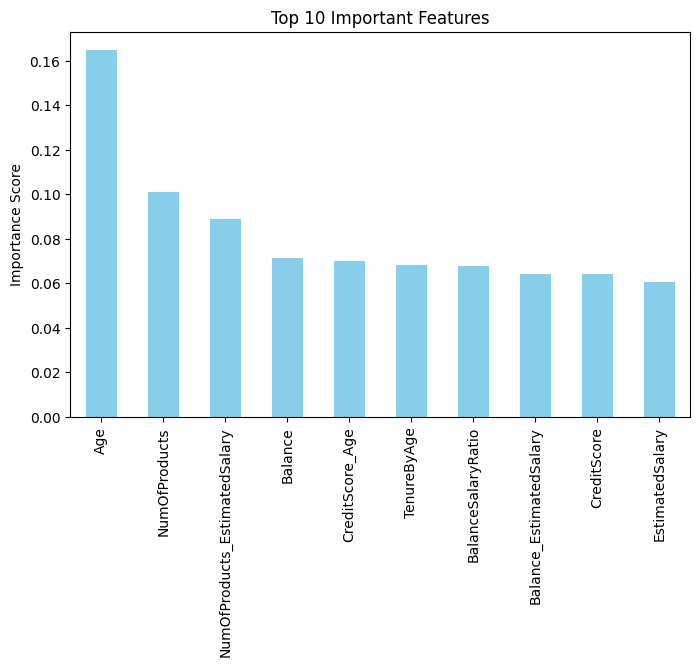

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X_train.columns)

# Sort and display
importances = importances.sort_values(ascending=False)
print(importances.head(10))

# Plot top features
plt.figure(figsize=(8,5))
importances.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Important Features')
plt.ylabel('Importance Score')
plt.show()
